In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct separator
file_path = "/home/maria/CrimeStats/data/avalik_1(1).csv"
dat = pd.read_csv(file_path, sep='\t', encoding='utf-8')

# Filter for Tallinn
tallinn = dat[dat['ValdLinnNimetus'] == 'Tallinn'].copy()

# Parse date and time
tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
tallinn['ToimKell'] = pd.to_timedelta(tallinn['ToimKell'] + ':00')

# Combine to datetime
tallinn['ToimDatetime'] = tallinn['ToimKpv'] + tallinn['ToimKell']
tallinn = tallinn.dropna(subset=['ToimDatetime'])

# Clean and split crime types
tallinn['SyndmusLiik'] = (
    tallinn['SyndmusLiik']
    .fillna('')
    .astype(str)
    .str.strip()
    .str.upper()
)

# Split by comma and explode to new rows
tallinn_expanded = tallinn.assign(
    SyndmusLiik=tallinn['SyndmusLiik'].str.split(',')
).explode('SyndmusLiik')

# Remove whitespace and invalid empty entries
tallinn_expanded['SyndmusLiik'] = tallinn_expanded['SyndmusLiik'].str.strip()
tallinn_expanded = tallinn_expanded[tallinn_expanded['SyndmusLiik'] != '']

# Set datetime index
tallinn_expanded.set_index('ToimDatetime', inplace=True)

# Group by day and crime type
daily_crime_matrix = (
    tallinn_expanded
    .groupby([pd.Grouper(freq='D'), 'SyndmusLiik'])
    .size()
    .unstack(fill_value=0)
    .sort_index(axis=1)
)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct separator
file_path = "/home/maria/CrimeStats/data/avalik_1(1).csv"
dat = pd.read_csv(file_path, sep='\t', encoding='utf-8')

# Filter for Tallinn
tallinn = dat[dat['ValdLinnNimetus'] == 'Tallinn'].copy()

# Parse date and time
tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
tallinn['ToimKell'] = pd.to_timedelta(tallinn['ToimKell'] + ':00')

# Combine to datetime
tallinn['ToimDatetime'] = tallinn['ToimKpv'] + tallinn['ToimKell']
tallinn = tallinn.dropna(subset=['ToimDatetime'])

# Clean and split crime types
tallinn['SyndmusLiik'] = (
    tallinn['SyndmusLiik']
    .fillna('')
    .astype(str)
    .str.strip()
    .str.upper()
)

# Split by comma and explode to new rows
tallinn_expanded = tallinn.assign(
    SyndmusLiik=tallinn['SyndmusLiik'].str.split(',')
).explode('SyndmusLiik')

# Remove whitespace and invalid empty entries
tallinn_expanded['SyndmusLiik'] = tallinn_expanded['SyndmusLiik'].str.strip()
tallinn_expanded = tallinn_expanded[tallinn_expanded['SyndmusLiik'] != '']

# Set datetime index
tallinn_expanded.set_index('ToimDatetime', inplace=True)

# Group by day and crime type
daily_crime_matrix = (
    tallinn_expanded
    .groupby([pd.Grouper(freq='D'), 'KohtNimetus'])
    .size()
    .unstack(fill_value=0)
    .sort_index(axis=1)
)
daily_crime_matrix

KohtNimetus,Haabersti linnaosa,Kesklinna linnaosa,Kristiine linnaosa,Lasnamäe linnaosa,Mustamäe linnaosa,Nõmme linnaosa,Pirita linnaosa,Põhja-Tallinna linnaosa,Tallinn
ToimDatetime,,,,,,,,,
2024-01-01,0,4,1,6,2,0,0,2,0
2024-01-02,1,2,4,6,2,0,0,0,0
2024-01-03,2,1,2,2,1,0,0,3,0
2024-01-04,2,0,1,2,1,1,0,2,1
2024-01-05,0,3,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2025-05-15,0,3,0,1,0,0,0,0,0
2025-05-16,0,3,3,1,0,0,0,0,0
2025-05-18,0,1,0,2,0,0,0,0,0


In [4]:
dat

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik
0,076ae31a-9911-18dd-86ac-eda55f951789,2025-05-20,21:46,Teisipäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,0-499,TANAV_VALJAK,Ida-Viru maakond,Jõhvi linn,Jõhvi linn,6584500-6584999,694000-694499,VT
1,076ae310-9911-18dd-86ac-eda55f951789,2025-05-20,17:20,Teisipäev,ROOVIMINE,NaN,Karistusseadustik,§ 200.,§ 200. Röövimine,lg. 1.,0-499,"AVALIK_KOHT,TANAV_VALJAK",Tartu maakond,Tartu linn,Tartu linn,6475000-6475499,659000-659499,KT
2,076ae306-9911-18dd-86ac-eda55f951789,2025-05-20,15:17,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Lasnamäe linnaosa,NaN,NaN,VT
3,076ae2fc-9911-18dd-86ac-eda55f951789,2025-05-20,15:00,Teisipäev,VARGUS,NaN,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,AVALIK_KOHT,Harju maakond,Tallinn,Nõmme linnaosa,6581000-6581999,543000-543999,KT
4,076ae2e8-9911-18dd-86ac-eda55f951789,2025-05-20,14:38,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Lasnamäe linnaosa,6590500-6590999,549500-549999,VT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,63aeef5c-1d86-18dc-94b4-9265e36cf89f,2024-01-01,02:34,Esmaspäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,0-499,TANAV_VALJAK,Harju maakond,Tallinn,Põhja-Tallinna linnaosa,6590500-6590999,541000-541499,VT
8335,61796194-6508-18dc-961b-c46c47f94e77,2024-01-01,02:20,Esmaspäev,VANDALISM,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,MUU KOHT",Viljandi maakond,Viljandi linn,Viljandi linn,6470000-6470499,593000-593499,VT
8336,7c9fd3da-4407-18dc-961b-c46c47f94e77,2024-01-01,01:15,Esmaspäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,NaN,NaN,VT
8337,f022d668-3386-18dc-961b-c46c47f94e77,2024-01-01,00:13,Esmaspäev,VARGUS,"MOBIILTELEFONIVARGUS,MUU_VARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,6589000-6589499,542000-542499,KT


In [7]:
daily_crime_matrix

SyndmusLiik,AVALIKU_KORRA_RIKKUMINE,ILLEGAALNE_KAUBA_MUUK,JALGRATTA_MOPEEDI_VARGUS,JUHTUM_LOOMAGA,JUHTUM_TULIRELVAGA,KADUNUD_ESE/DOKUMENT,KAUPLEMISE_NOUETE_RIKKUMINE,KEHALINE_VAARKOHTLEMINE,KELMUS,KONFLIKT/OMAVOLI,...,MUU,NARKOJUHTUM,PISIVARGUS,PLAHVATUS,POMMIAHVARDUS_KAHTLUS,ROOVIMINE,TULEKAHJU,VALIMISED,VANDALISM,VARGUS
ToimDatetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01,1,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,4,8
2024-01-02,1,0,0,0,0,0,0,1,0,0,...,0,0,6,0,0,0,0,0,0,6
2024-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,1,5
2024-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,1,4
2024-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
2025-05-16,0,0,0,0,0,0,0,0,0,0,...,1,0,3,0,0,0,0,0,0,3
2025-05-18,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1


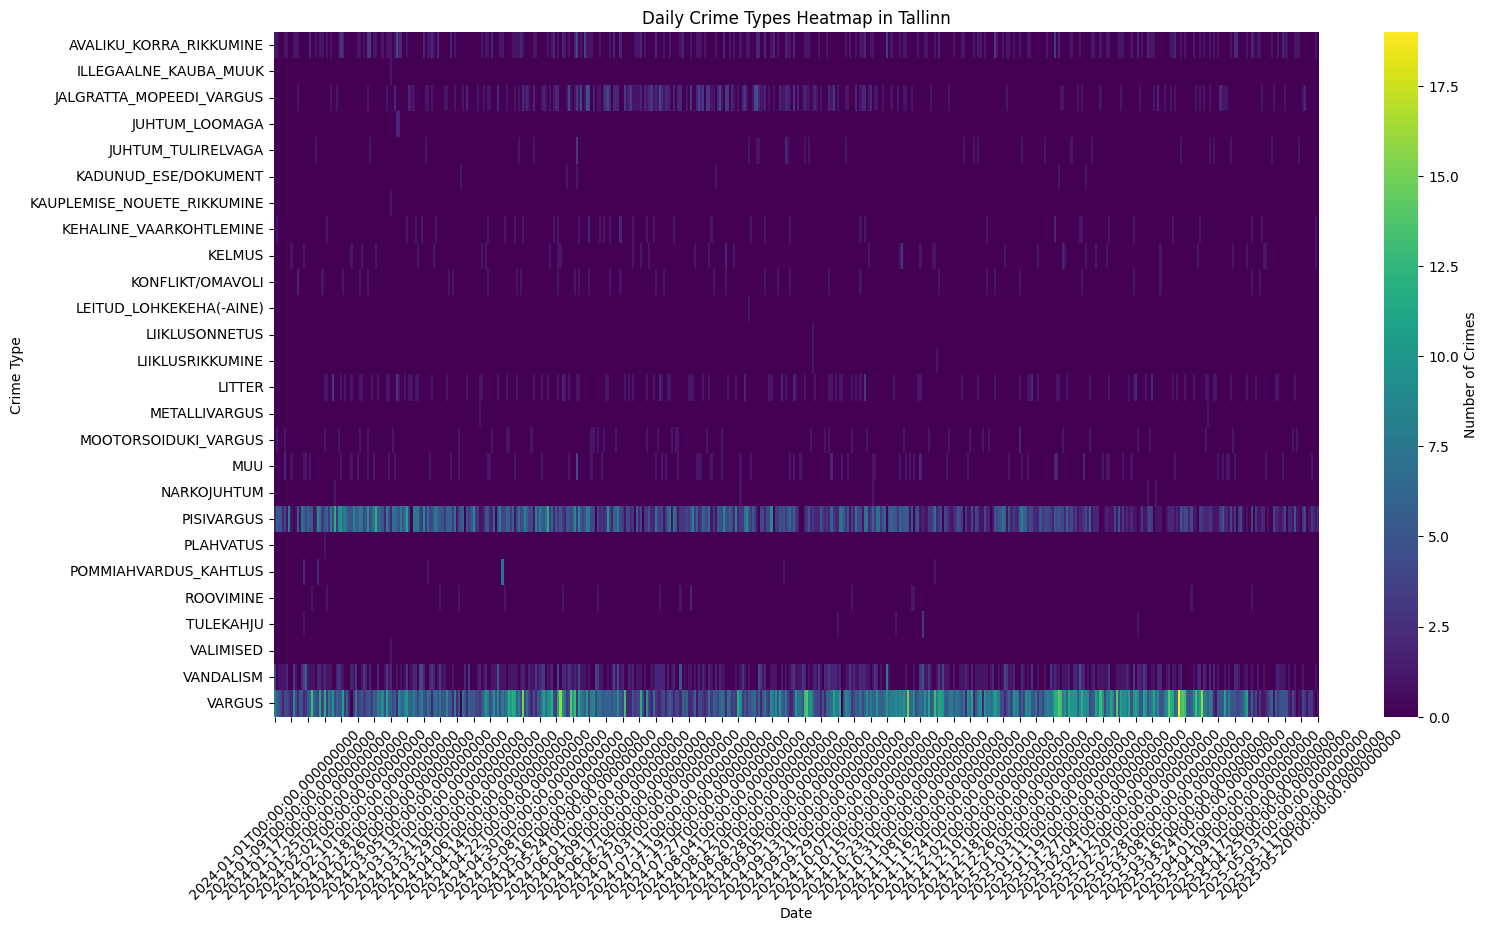

In [8]:
# Plot as heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(daily_crime_matrix.T, cmap="viridis", cbar_kws={'label': 'Number of Crimes'})
plt.title("Daily Crime Types Heatmap in Tallinn")
plt.xlabel("Date")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [10]:
import numpy as np

def build_hankel_tensor(matrix, window_size):
    """
    matrix: pd.DataFrame of shape (T, D) where T = number of days, D = number of crime types
    window_size: size of the time window (L)
    
    Returns: np.ndarray of shape (L, T-L+1, D)
    """
    data = matrix.values  # shape: (T, D)
    T, D = data.shape
    K = T - window_size + 1  # number of windows

    # Initialize the Hankel tensor: (window_size, num_windows, num_features)
    hankel_tensor = np.zeros((window_size, K, D))

    for d in range(D):  # for each crime type
        for k in range(K):  # sliding window start
            hankel_tensor[:, k, d] = data[k:k+window_size, d]

    return hankel_tensor

hankel=build_hankel_tensor(daily_crime_matrix,window_size=10)


In [11]:
hankel

array([[[1., 0., 0., ..., 0., 4., 8.],
        [1., 0., 0., ..., 0., 0., 6.],
        [0., 0., 0., ..., 0., 1., 5.],
        ...,
        [1., 0., 0., ..., 0., 1., 2.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 6.],
        [0., 0., 0., ..., 0., 1., 5.],
        [0., 0., 0., ..., 0., 1., 4.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 1., 5.],
        [0., 0., 0., ..., 0., 1., 4.],
        [0., 0., 0., ..., 0., 1., 2.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 1., 4.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 3.],
        [0., 0., 0., ..., 0., 0., 2.],
        [1., 0., 0., ..., 0., 3., 9.],
        ...,
        [0., 0., 0., ..., 0., 0., 3.],
        [0., 0., 0., ..., 0., 0., 3.],
        [0., 0., 0., ..., 0., 0.

In [12]:
def compute_hankel_ranks(hankel_tensor, threshold=1e-3):
    """
    hankel_tensor: np.ndarray of shape (L, K, D)
    threshold: minimum singular value to count as non-zero

    Returns: dict of {crime_index: rank}
    """
    L, K, D = hankel_tensor.shape
    ranks = {}

    for d in range(D):
        H_d = hankel_tensor[:, :, d]  # shape (L, K)
        U, S, Vt = np.linalg.svd(H_d, full_matrices=False)
        rank = np.sum(S > threshold)
        ranks[d] = rank

    return ranks

ranks=compute_hankel_ranks(hankel)
print(ranks)

{0: np.int64(10), 1: np.int64(10), 2: np.int64(10), 3: np.int64(10), 4: np.int64(10), 5: np.int64(10), 6: np.int64(10), 7: np.int64(10), 8: np.int64(10), 9: np.int64(10), 10: np.int64(10), 11: np.int64(10), 12: np.int64(10), 13: np.int64(10), 14: np.int64(10), 15: np.int64(10), 16: np.int64(10), 17: np.int64(10), 18: np.int64(10), 19: np.int64(10), 20: np.int64(10), 21: np.int64(10), 22: np.int64(10), 23: np.int64(10), 24: np.int64(10), 25: np.int64(10)}


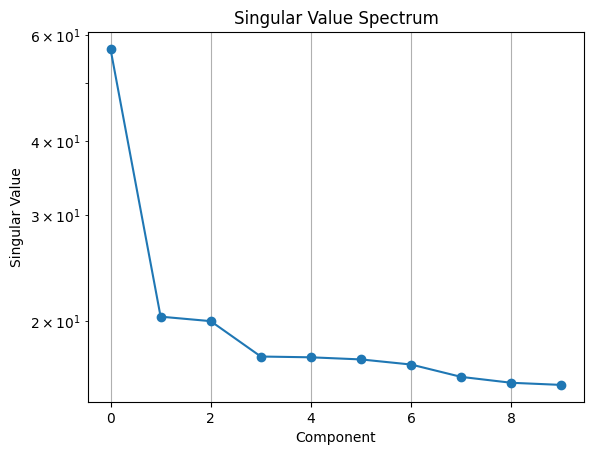

In [16]:
import matplotlib.pyplot as plt
U, S, Vt = np.linalg.svd(hankel[:, :, 2])  # any crime type
plt.plot(S, marker='o')
plt.title("Singular Value Spectrum")
plt.xlabel("Component")
plt.ylabel("Singular Value")
plt.yscale("log")
plt.grid(True)
plt.show()


In [18]:
def compute_effective_rank(singular_values, threshold_ratio=0.05):
    """
    Returns the number of singular values greater than threshold_ratio * first singular value.
    """
    return np.sum(singular_values > threshold_ratio * singular_values[0])

def effective_ranks_all(hankel_tensor, threshold_ratio=0.05):
    L, K, D = hankel_tensor.shape
    ranks = []

    for d in range(D):
        _, S, _ = np.linalg.svd(hankel_tensor[:, :, d], full_matrices=False)
        rank = compute_effective_rank(S, threshold_ratio)
        ranks.append(rank)

    return ranks

ranks=effective_ranks_all(hankel)
ranks

[np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10),
 np.int64(10)]